In [108]:
import rm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
my_search = rm.rm(None)

In [89]:
locations = ['st albans station',
             'richmond station' ,
             'west dulwich station' , 
             'stevenage station' , 
             'welwyn north station' , 
             'welwyn garden city station' , 
             'sevenoaks station' , 
             'dunton green station'
             'cambridge station',
             ]

In [194]:
search_dict = {'locationIdentifier': 'sevenoaks station',
               'minBedrooms' : 3,
               'maxBedrooms' : 3,
               'propertyTypes': 'semi-detached',
               'primaryDisplayPropertyType':'houses',
                # 'propertyTypes': 'detached%2Csemi-detached%2Cterraced',
               'minPrice': 350000,
               'maxPrice': 750000,
               'radius': 1.0,
               'apiApplication': 'IPAD',
                }

In [195]:
my_search.clear_df()
my_search.set_search_details(search_dict)

In [196]:
my_search.run_search()

total available results:  19
results per page : 25
Needed scrapes:  1
-------------------
Scraping Round :  1
-------------------
URL :  https://api.rightmove.co.uk/api/sale/find?index=0&sortType=1&numberOfPropertiesRequested=50&locationIdentifier=STATION%255E8081&minBedrooms=3&maxBedrooms=3&propertyTypes=semi-detached&primaryDisplayPropertyType=houses&minPrice=350000&maxPrice=750000&radius=1.0&apiApplication=IPAD
Scraped:  SUCCESS
total results:  19
Added  19  houses


In [197]:
my_search.df.head(3)

,address,bedrooms,distance,photoCount,propertyType,price,updateDateStr,updateDate,latitude,longitude,floorplanCount,sortDate,sortDateStr,identifier,premiumDisplay,autoEmailReasonType,priceQualifier,scrapeDate,days_since_post,searched_location
0,"Holyoake Terrace, Sevenoaks, TN13",3,0.1030,8,terraced house,375000.0,2020-01-19,2020-01-19 04:12:40,51.275550,0.181592,1,2019-11-27 11:36:47,2019-11-27,86488658,True,price_reduced,,2020-01-19 10:06:14.278905,52,"Sevenoaks Station, Sevenoaks, Kent"
1,"Wickenden Road, Sevenoaks, TN13",3,0.9141,11,semi-detached house,410000.0,2020-01-14,2020-01-14 11:43:35,51.286420,0.196575,0,2019-10-11 18:02:40,2019-10-11,60228255,True,price_reduced,Guide Price,2020-01-19 10:06:14.278941,99,"Sevenoaks Station, Sevenoaks, Kent"
2,"Swaffield Road, SEVENOAKS, Kent, TN13 3PP",3,0.9178,11,semi-detached house,424950.0,2020-01-18,2020-01-18 22:09:28,51.285748,0.197695,1,2019-11-13 17:30:18,2019-11-13,66398748,False,new,,2020-01-19 10:06:14.278964,66,"Sevenoaks Station, Sevenoaks, Kent"


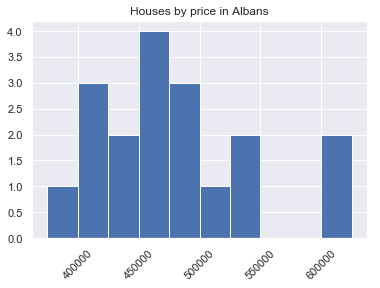

In [206]:
my_search.price_hist('in Albans')

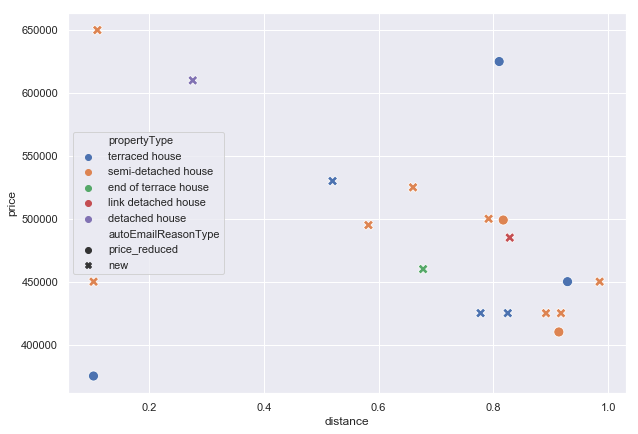

In [199]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'distance', y = 'price', hue = 'propertyType', data = my_search.df, s = 100, style = 'autoEmailReasonType')
# plt.legend(loc='upper right')
plt.show()

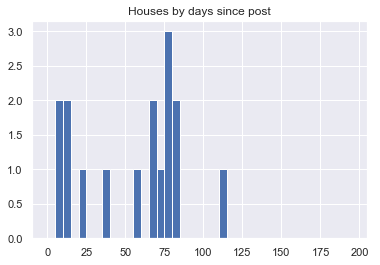

In [192]:
plt.hist(my_search.df.days_since_post, bins = np.arange(0,200,5))
plt.title('Houses by days since post');

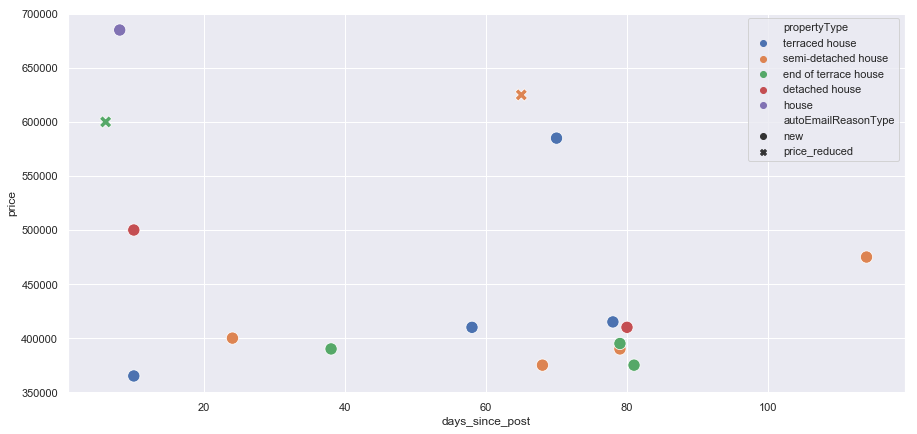

In [193]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'days_since_post', y = 'price', hue = 'propertyType', 
                data = my_search.df[my_search.df.days_since_post<305],
                style = 'autoEmailReasonType', s = 150)
# plt.legend(loc='upper right')
plt.show()

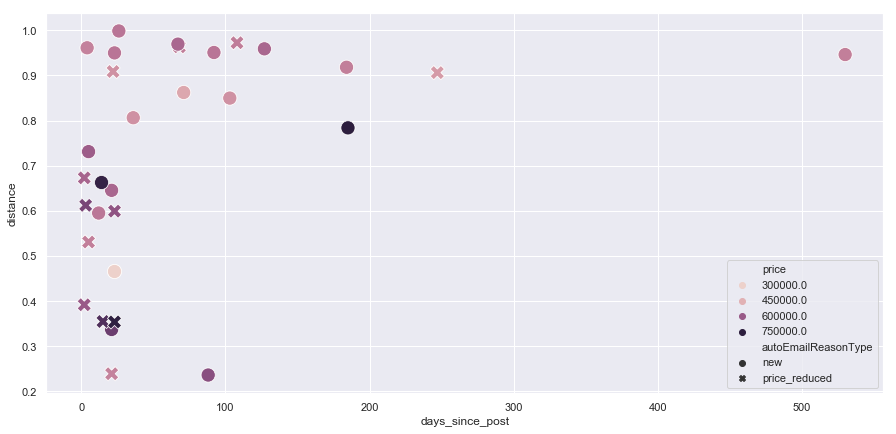

In [182]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'days_since_post', y = 'distance' , s = 200, hue = 'price',  style = 'autoEmailReasonType', data = my_search.df);

In [210]:
my_search.df.columns

Index(['address', 'bedrooms', 'distance', 'photoCount', 'propertyType',
       'price', 'updateDateStr', 'updateDate', 'latitude', 'longitude',
       'floorplanCount', 'sortDate', 'sortDateStr', 'identifier',
       'premiumDisplay', 'autoEmailReasonType', 'priceQualifier', 'scrapeDate',
       'days_since_post', 'searched_location'],
      dtype='object')

In [218]:
my_search.df[['price','days_since_post','autoEmailReasonType']].describe()

,price,days_since_post
count,19.000000,19.000000
mean,484942.105263,82.473684
std,75657.466884,64.118266
min,375000.000000,1.000000
25%,425000.000000,31.000000
50%,460000.000000,66.000000
75%,512500.000000,122.500000
max,650000.000000,222.000000


In [224]:
my_search.df['autoEmailReasonType'].value_counts()/len(my_search.df)

new              0.736842
price_reduced    0.263158
Name: autoEmailReasonType, dtype: float64